# Titanic - Machine Learning from Disaster

## Project Overview

### 1. Problem Definition
This is a playground Kaggle Competition: https://www.kaggle.com/c/titanic
* While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
* Given some features of someone, predict whether he will survive from Titanic shipwreck or not. 

### 2. Data 
Data is also available from Kaggle: https://www.kaggle.com/c/titanic/data

**Overview**

The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)

Here are main variables.
1. survival: 1 is Yes, 0 is No.
  * this is **Label** We want to predict.
2. Age: age in years
  * It maybe relates to survival, say eldery is more difficult to survive that youngesters.
3. pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower


### 3. Evaluation
Evaluation metrics is `accuracy`. https://www.kaggle.com/c/titanic/overview/evaluation

I would like to build a model with:
* 90% accuracy
Also, I should monitor precision, recall, and f1.

Even if the accuracy is great, I reject the model if another metrics were terrible.

### 4. Features
Just guessing, with seeing no nodata, Age itself affects survival.
Also, sex and cabin seem to have impact.

### 5. Model

The problem is binary classification.
<img src="https://drive.google.com/uc?id=1FGvA69pXd97vrEeumbVIvRccvUrYYrPF" width="600">
 https://www.analyticsvidhya.com/blog/2020/11/popular-classification-models-for-machine-learning/

I will choose model after analyzing features.


## Import nacessary tools


In [2]:
# EDA
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## 2. Data
* a. Unzip data

In [2]:
# !unzip drive/MyDrive/Github/Kaggle/Titanic/data.zip -d drive/MyDrive/Github/Kaggle/Titanic

Archive:  drive/MyDrive/Github/Kaggle/Titanic/data.zip
  inflating: drive/MyDrive/Github/Kaggle/Titanic/gender_submission.csv  
  inflating: drive/MyDrive/Github/Kaggle/Titanic/test.csv  
  inflating: drive/MyDrive/Github/Kaggle/Titanic/train.csv  


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Github/Kaggle/Titanic/data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First of all, are there any missing?

In [123]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Define kinds of age
unique_age = np.sort(df.Age.unique()[~np.isnan(df.Age.unique())])
unique_age

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

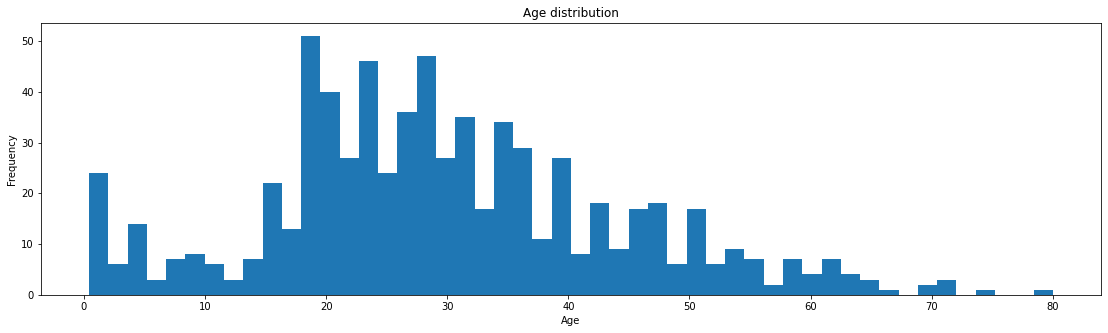

In [66]:
fig, ax = plt.subplots(figsize=(19,5))
ax.hist(df.Age,bins=50);
ax.set(xlabel="Age",ylabel="Frequency",title="Age distribution");


Older than <some age> should be ommited??
missing value should be filled by 50 percentile of age?

In [62]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
survived_per_age = pd.DataFrame(index = None, columns=["UniqueAge","SurviversPerAge"])
survived_per_age["UniqueAge"] = unique_age

survived_per_age["SurviversPerAge"] = list(df.groupby(by=df.Age)["Survived"].sum()) 

survived_per_age["SurviversPerAge"] = **list**(df.groupby(by=df.Age)["Survived"].sum())

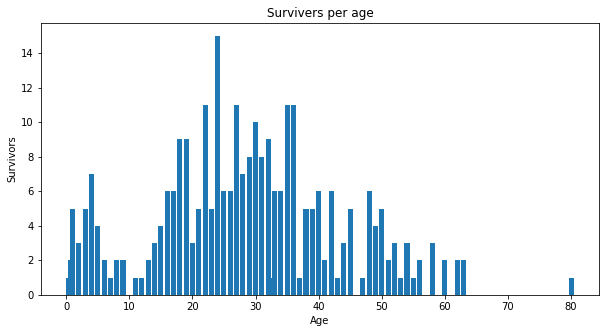

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=survived_per_age.UniqueAge,
           height=survived_per_age.SurviversPerAge);
ax.set(title="Survivers per age",
       xlabel="Age",
       ylabel="Survivors");

Hmm... Age of 80 is outlier??

In [18]:
df[df.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


Next, I need Survivng rate

In [ ]:
survived_per_age["AllPassengers"]= list(df.groupby(df.Age)["Survived"].count())
survived_per_age["SurvivedRate"] = survived_per_age["SurviversPerAge"]/survived_per_age["AllPassengers"]

In [35]:
survived_per_age.head(10)

,UniqueAge,SurviversPerAge,AllPassengers,SurvivedRate
0,0.42,1,1,1.000000
1,0.67,1,1,1.000000
2,0.75,2,2,1.000000
3,0.83,2,2,1.000000
4,0.92,1,1,1.000000
5,1.00,5,7,0.714286
6,2.00,3,10,0.300000
7,3.00,5,6,0.833333
8,4.00,7,10,0.700000
9,5.00,4,4,1.000000


In [36]:
df[df.Age==2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


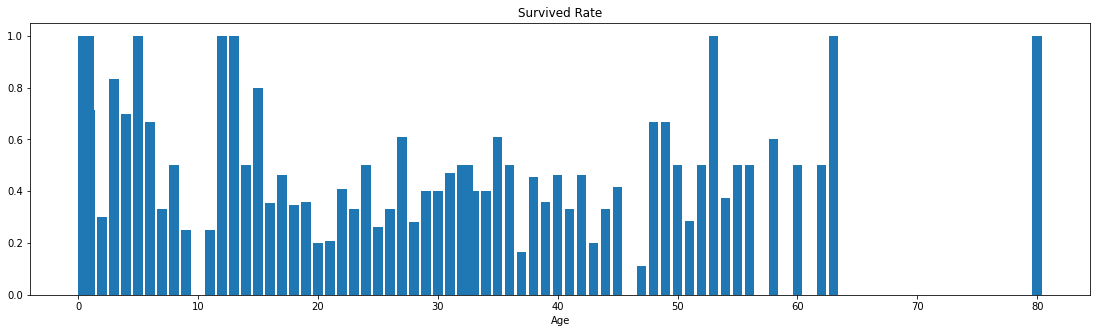

In [46]:
fig, ax = plt.subplots(figsize=(19,5));
ax.bar(survived_per_age.UniqueAge, survived_per_age.SurvivedRate)
ax.set(title="Survived Rate", xlabel="Age");

In [63]:
survived_per_age.SurvivedRate.describe()

count    88.000000
mean      0.392889
std       0.322385
min       0.000000
25%       0.000000
50%       0.387500
75%       0.500000
max       1.000000
Name: SurvivedRate, dtype: float64

In [67]:
survived_per_age.SurviversPerAge.describe()

count    88.000000
mean      3.295455
std       3.421229
min       0.000000
25%       0.000000
50%       2.000000
75%       5.250000
max      15.000000
Name: SurviversPerAge, dtype: float64

In [55]:
df.groupby(df.Survived)["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


#### What I did and How I do
I started with **Age**

1. Bell-Curve like distibution, but some outliers.
--> How about binning 'Child' 'Adult' 'Elderly' ?
2. The number of subibers distributed same as age distribution, but children is not the same.
--> Parameter `is_child` maybe work
3. Surviving rate maybe **child >= elderly >= adult**
--> **Need confirmation**
4. It seems that age distribution between survivers vs. casualties is not so different.
--> **Need confermation. How about t-Test??**